In [16]:
import pandas as pd
import os
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt

In [ ]:
#doesn't work, main data file has multiple worksheets
# csvpath = os.path.join("..", "member_info.csv")
# df1=pd.read_csv(csvpath)
# df1.head()

In [2]:
#import xlsx and read each worksheet as a separate df
csvpath = os.path.join("..", "member_info.xlsx")
xlsx = pd.ExcelFile(csvpath)
gup_members_df = pd.read_excel(xlsx, 'Gup Members')
gup_tests_df = pd.read_excel(xlsx, 'Gup Tests')
dan_members_df = pd.read_excel(xlsx, 'Dan Members')
dan_promotion_df = pd.read_excel(xlsx, 'Dan Promotion')
studio_df = pd.read_excel(xlsx, 'Studio')

In [ ]:
dan_members_df.head()

In [3]:
#removes rows where 'Date of Birth' was NaN
dan_members_df['Date of Birth']=pd.to_datetime(dan_members_df['Date of Birth'])
dan2_df=dan_members_df.dropna(subset=['Date of Birth'])
dan2_df.head()


,ID,Region,Date of Birth,Expiration Date,Zip Code,Dan Level,Studio,1st Degree,2nd Degree,3rd Degree,4th Degree,4th Master
19,D00327,3.0,1900-01-01,2003-12-31 00:00:00,52002-0000,2,Inactive School,NaT,1990-12-01,NaT,NaT,NaT
20,D00642,1.0,1900-01-01,2004-12-31 00:00:00,98527,2,Inactive School,1992-12-01,1996-12-01,NaT,NaT,NaT
21,D04531,8.0,1900-01-01,2007-12-31 00:00:00,16823,1,S1242,2004-07-01,NaT,NaT,NaT,NaT
22,D07679,8.0,1900-01-01,2011-12-31 00:00:00,19348,1,S1902,2009-07-01,NaT,NaT,NaT,NaT
23,D10517,14.0,1900-01-01,2016-12-31 00:00:00,NaN,1,Inactive School,2013-12-01,NaT,NaT,NaT,NaT


In [9]:
#pulls year from 'Date of Birth'
dan2_df['Birthday']=pd.DatetimeIndex(dan2_df['Date of Birth']).year
dan2_df.head()

c:\users\belac\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Region,Date of Birth,Expiration Date,Zip Code,Dan Level,Studio,1st Degree,2nd Degree,3rd Degree,4th Degree,4th Master,Birthday
19,D00327,3.0,1900-01-01,2003-12-31 00:00:00,52002-0000,2,Inactive School,NaT,1990-12-01,NaT,NaT,NaT,1900
20,D00642,1.0,1900-01-01,2004-12-31 00:00:00,98527,2,Inactive School,1992-12-01,1996-12-01,NaT,NaT,NaT,1900
21,D04531,8.0,1900-01-01,2007-12-31 00:00:00,16823,1,S1242,2004-07-01,NaT,NaT,NaT,NaT,1900
22,D07679,8.0,1900-01-01,2011-12-31 00:00:00,19348,1,S1902,2009-07-01,NaT,NaT,NaT,NaT,1900
23,D10517,14.0,1900-01-01,2016-12-31 00:00:00,NaN,1,Inactive School,2013-12-01,NaT,NaT,NaT,NaT,1900


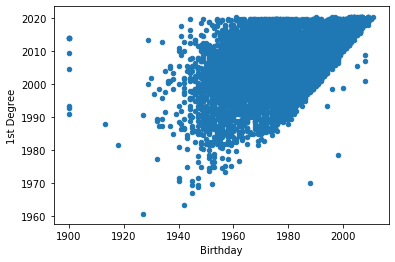

In [12]:
#x-axis is birthday, y-axis is date of receiving first degree.  Want to change x axis to age
dan2_df.plot(kind='scatter', x='Birthday', y='1st Degree')

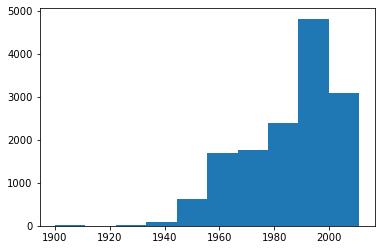

In [19]:
#histogram of number of black belts born in each year
x=dan2_df['Birthday']
plt.hist(x)
plt.show()

c:\users\belac\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\belac\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\belac\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

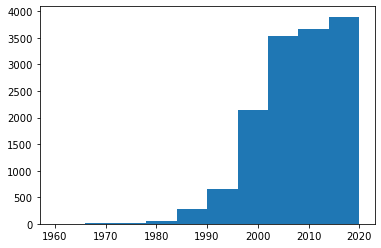

In [27]:
#shows number of new black belts tested each year
dan2_df['1st']=pd.DatetimeIndex(dan2_df['1st Degree']).year
x=dan2_df['1st']
plt.hist(x)
plt.show